In [20]:
import os
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [50]:
df = pd.read_csv("dados/dados_to_fit.csv", header=None, names=['colum1'])
x = df.sort_values(by='colum1')['colum1'].values

df = pd.read_csv("dados/dados_to_fit_amostragem.csv", header=None, names=['colum1'])
x1 = df.sort_values(by='colum1')['colum1'].values

In [64]:
import scipy.stats
params = scipy.stats.cauchy.fit(x1)
params

(26.487030370516365, 11.389321987840692)

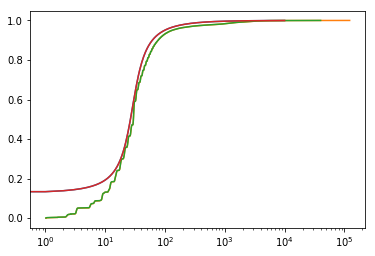

In [65]:
f = scipy.stats.cauchy.freeze(args)

# Separate parts of parameters
arg = params[:-2]
loc = params[-2]
scale = params[-1]

x2 = range(0, 10000)

plt.semilogx(x2, scipy.stats.cauchy.cdf(x2, loc=loc, scale=scale, *arg))
y = np.arange(1.0, len(x)+1) / len(x)
y1 = np.arange(1.0, len(x1)+1) / len(x1)
plt.semilogx(x, y)
plt.semilogx(x1, y1)

plt.semilogx(x2, [fcauch(item, 26.487030370516365, 11.389321987840692) for item in x2])
#scipy.stats.foldcauchy.cdf()

In [46]:
scipy.stats.foldcauchy.cdf(100, *args)

0.90889613307659001

In [40]:
import math
def fcauch(x, x0, b):
    return (1./math.pi)*math.atan((x-x0)/b)+0.5 

In [ ]:
x = range(0, 10000)
plt.semilogx(x, f.cdf(x), lw=3)

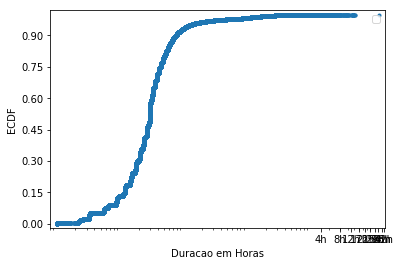

In [17]:
###################################
###  Receita de Bolo para ECDFs  ##
###  CookBook from ECDFs         ##
###################################

#Dont touch in Y 
#Nao mexa no Y
y = np.arange(1.0, len(x)+1) / len(x)

#Ingrediente 2 - Customize suas linhas
#Ingredient 2 - Custom your lines
plt.semilogx(x, y, marker='.', linestyle='none')

#Ingredient 3 - Define your label axis
#Ingrediente 3 - Defina os rotulos dos eixos
plt.xlabel("Duracao em Horas")
plt.ylabel("ECDF")
plt.margins(0.02)

#Ingredient 5 - Define your pattern from x(or y) axis
#Ingrediente 5 - Defina o padrao dos numeros eixo x(ou y)
def major_formatter(a, pos):
    return "%.fh" % (a/60/60)

ax = plt.axes()

#Ingredient 6 - Define how many elements show in y axis
#Ingrediente 6 - Defina Quantos elementos aparecerao no eixo y
ax.yaxis.set_major_locator(plt.MaxNLocator(9))

#Ingredient 7 - Define how many elements show in x axis
#Ingrediente 7 - Defina Quantos elementos aparecerao no eixo x
ax.xaxis.set_major_locator(plt.MaxNLocator(11))

#Ingredient 8 - Add the Ingredient 5 in x axis
#Ingrediente 8 - Adiciona o Ingrediente 5 no eixo x
ax.xaxis.set_major_formatter(plt.FuncFormatter(major_formatter))

#Plot
plt.legend()